In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
ethnicity_data_df = pd.read_csv("Data_processed/cleaned_ethnicity_data.csv")

# Set the year as an index
ethnicity_data_df.set_index("Year",inplace=True,drop="True")

# Sort data by year
ethnicity_data_df = ethnicity_data_df.sort_values(by='Year')

#ethnicity_data_df.index = ethnicity_data_df.index.astype("str")
ethnicity_data_df.head()

,gender,ethnicity_major,ethnicity_minor,free_school_meals,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_entered_eng_maths,perc_achieving_grade_5to9_eng_maths
Year,,,,,,,,,,
2019,Total,Mixed,White and Black Caribbean,Total,2325,7504,41.0,-0.38,96.0,31.0
2019,Boys,Black,Any other black background,Total,917,1941,38.7,-0.23,93.9,28.8
2019,Boys,White,White British,Total,3656,191322,43.6,-0.38,96.2,39.2
2019,Girls,Mixed,White and Black Caribbean,FSM all other,1443,2850,47.2,0.04,98.2,39.2
2019,Girls,White,Gypsy/Roma,FSM,141,206,20.2,-0.70,81.6,6.3


In [26]:
# Extract data for boys and girls for both attainment and progress

boys_a8_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Boys") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]

girls_a8_df = ethnicity_data_df[(ethnicity_data_df["gender"]=="Girls") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]


boys_p8_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                               & (ethnicity_data_df["gender"]=="Boys") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]

girls_p8_df = ethnicity_data_df[((ethnicity_data_df.index != "2020") & (ethnicity_data_df.index !="2021")) \
                               & (ethnicity_data_df["gender"]=="Girls") \
                               & (ethnicity_data_df["ethnicity_major"]=="Total") \
                               & (ethnicity_data_df["free_school_meals"]=="Total")]


[]

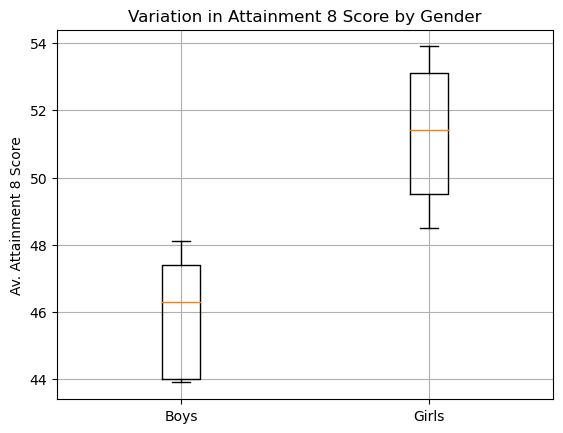

In [40]:
# Box plot difference between genders for attainment

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,linestyle='none', markeredgecolor='b')
plt.boxplot([boys_a8_df["avg_attainment8_score"],girls_a8_df["avg_attainment8_score"]],flierprops=flierprops)
plt.ylabel("Av. Attainment 8 Score")
plt.xticks([1,2],["Boys","Girls"])
plt.title("Variation in Attainment 8 Score by Gender")
plt.grid()
plt.savefig("Graphs\Q1_Boxplot_of_gender_differences.png")
plt.plot()

In [28]:
# run Annova test for difference between gender for attainment
anova_gender_res = stats.f_oneway(boys_a8_df["avg_attainment8_score"],girls_a8_df["avg_attainment8_score"])

# run Annova test for difference between gender for progress
stats.f_oneway(boys_p8_df["avg_progress8_score"],girls_p8_df["avg_progress8_score"])

anova_gender_res

F_onewayResult(statistic=15.868447412353929, pvalue=0.004041742138805517)

In [29]:
# Extract data for all ethnicities

ethnicity_data_red_df = ethnicity_data_df[["gender","free_school_meals","ethnicity_major","ethnicity_minor","avg_attainment8_score","avg_progress8_score"]]

asian_df = ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="Total") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Asian") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  

black_df =ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="Total") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Black") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  

white_df =ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="Total") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="White") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  

mixed_df =ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="Total") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Mixed") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  

total_df =ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="Total") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Total") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  


[]

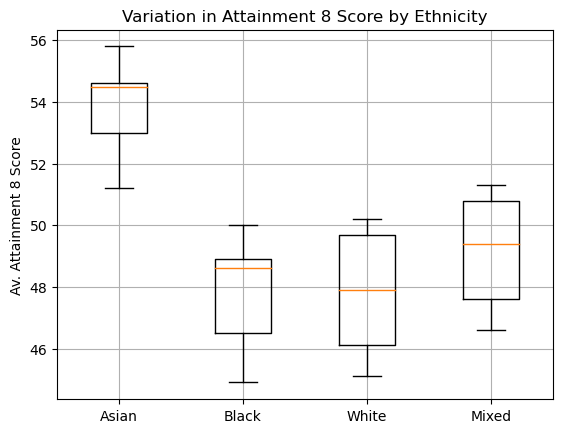

In [41]:
# Box plot difference between genders for attainment

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,linestyle='none', markeredgecolor='b')
plt.boxplot([asian_df["avg_attainment8_score"], \
             black_df["avg_attainment8_score"], \
             white_df["avg_attainment8_score"], \
             mixed_df["avg_attainment8_score"]],\
            flierprops=flierprops)
plt.ylabel("Av. Attainment 8 Score")
plt.xticks([1,2,3,4],["Asian","Black","White","Mixed"])
plt.title("Variation in Attainment 8 Score by Ethnicity")
plt.grid()
plt.savefig("Graphs\Q1_Boxplot_of_ethnicity_differences.png")
plt.plot()

group1,group2,meandiff,p-adj,lower,upper,reject
Asian,Black,-6.04,0.0012,-9.6924,-2.3876,True
Asian,Mixed,-4.68,0.0101,-8.3324,-1.0276,True
Asian,White,-6.02,0.0012,-9.6724,-2.3676,True
Black,Mixed,1.36,0.7147,-2.2924,5.0124,False
Black,White,0.02,1.0,-3.6324,3.6724,False
Mixed,White,-1.34,0.7236,-4.9924,2.3124,False


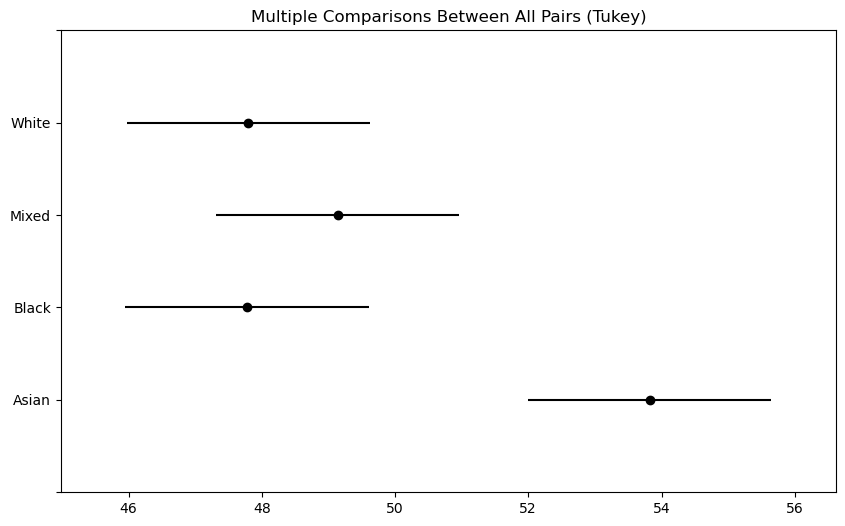

In [42]:
# Anova test for ethnicity differences in attainment 8
anova_ethnicity_res = stats.f_oneway(asian_df["avg_attainment8_score"], \
               black_df["avg_attainment8_score"], \
               white_df["avg_attainment8_score"], \
               mixed_df["avg_attainment8_score"])

# Tukey test for ethnicity differences in attainment 8
ethnic_df = pd.concat([asian_df,black_df,white_df,mixed_df],axis=0,ignore_index=True)

tukey = pairwise_tukeyhsd(endog = ethnic_df["avg_attainment8_score"],
                         groups = ethnic_df["ethnicity_major"],
                         alpha = 0.05)
tukey.plot_simultaneous()

plt.savefig("Graphs\Q1_Tukey_plot_of_ethnicities.png")

Results = pd.DataFrame(tukey.summary())
Results.to_csv("Graphs/Q1_Tukey_summary_of_ethnicities.csv")

tukey.summary()

In [43]:
# Annova test results for ethnicity
anova_ethnicity_res

F_onewayResult(statistic=10.049906935836866, pvalue=0.0005794584315205579)

In [44]:
# Extract data for free school meals (fsm) and non free school meals students

fsm_df =ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="FSM") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Total") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  


non_fsm_df = ethnicity_data_red_df[(ethnicity_data_red_df["gender"]=="Total") \
                                    & (ethnicity_data_red_df["free_school_meals"]=="FSM all other") \
                                    & (ethnicity_data_red_df["ethnicity_major"]=="Total") \
                                    &  (ethnicity_data_red_df["ethnicity_minor"]=="Total")]  

[]

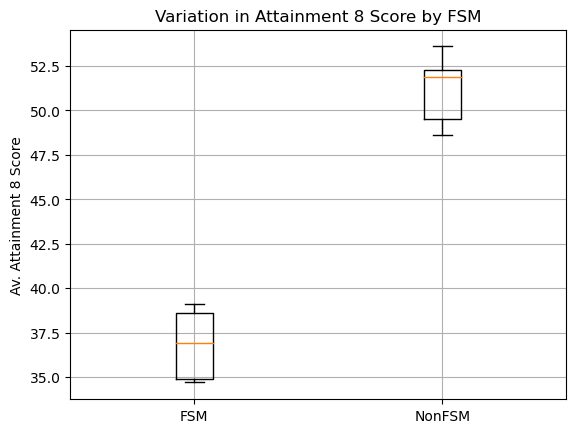

In [45]:
# Box plot difference between fsm and nonfsm for attainment

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,linestyle='none', markeredgecolor='b')
plt.boxplot([fsm_df["avg_attainment8_score"], \
             non_fsm_df["avg_attainment8_score"]], \
            flierprops=flierprops)
plt.ylabel("Av. Attainment 8 Score")
plt.xticks([1,2],["FSM","NonFSM"])
plt.title("Variation in Attainment 8 Score by FSM")
plt.grid()
plt.savefig("Graphs\Q1_Boxplot_of_fsm_differences.png")
plt.plot()

In [46]:
# Anova test for ethnicity differences in attainment 8
anova_fsm_res = stats.f_oneway(fsm_df["avg_attainment8_score"], \
               non_fsm_df["avg_attainment8_score"])
anova_fsm_res


F_onewayResult(statistic=122.18395721925103, pvalue=3.99901173309843e-06)

group1,group2,meandiff,p-adj,lower,upper,reject
AsianFSMBoys,AsianFSMGirls,5.72,0.0038,1.0958,10.3442,True
AsianFSMBoys,AsianNonFSMBoys,10.0,0.0,5.3758,14.6242,True
AsianFSMBoys,AsianNonFSMGirls,15.08,0.0,10.4558,19.7042,True
AsianFSMBoys,BlackFSMBoys,-4.32,0.0923,-8.9442,0.3042,False
AsianFSMBoys,BlackFSMGirls,3.3,0.454,-1.3242,7.9242,False
AsianFSMBoys,BlackNonFSMBoys,2.98,0.6266,-1.6442,7.6042,False
AsianFSMBoys,BlackNonFSMGirls,10.26,0.0,5.6358,14.8842,True
AsianFSMBoys,MixedFSMBoys,-7.46,0.0,-12.0842,-2.8358,True
AsianFSMBoys,MixedFSMGirls,-1.42,0.9991,-6.0442,3.2042,False
AsianFSMBoys,MixedNonFSMBoys,6.8,0.0002,2.1758,11.4242,True


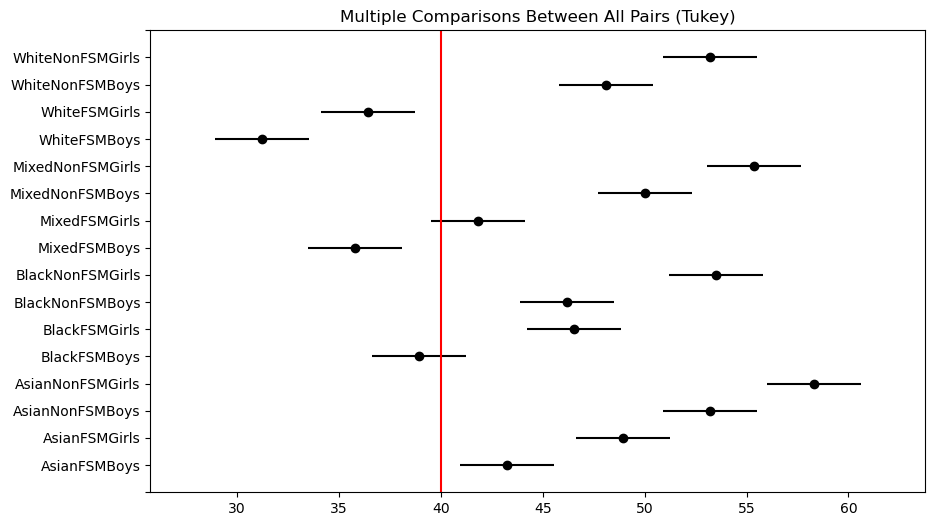

In [47]:
# Extract data for all possible combinations of ethnicity, free school meals and gender

all_groups_df = ethnicity_data_df[ (ethnicity_data_df["ethnicity_minor"]=="Total") \
                                  & (ethnicity_data_df["free_school_meals"] != "Total") \
                                  & ((ethnicity_data_df["ethnicity_major"] != "Total")  \
                                     & (ethnicity_data_df["ethnicity_major"] != "Other") \
                                     & (ethnicity_data_df["ethnicity_major"] != "Unclassified")\
                                     & (ethnicity_data_df["ethnicity_major"] != "Chinese")) 
                                  & (ethnicity_data_df["gender"] !="Total") ]  

all_groups_df = all_groups_df.replace("FSM all other","NonFSM")

group = []


#Make a string to describe each individual group for Tukey analysis
for i in range(0,len(all_groups_df)):
    gender = all_groups_df.iloc[i][0]                  #get gender string
    ethnicity = all_groups_df.iloc[i][1]               #get ethnicity string
    free_school_meals = all_groups_df.iloc[i][3]       #get free school meals string          
    string =  ethnicity + free_school_meals + gender
    group.append(string)
 
#Run Tukey analysis for all groups the attainment scores    
tukey = pairwise_tukeyhsd(endog = all_groups_df["avg_attainment8_score"],
                         groups = group,
                         alpha = 0.05)
tukey.plot_simultaneous()

# Plot a vertical line equivalent to 8 grade 5 passes    
plt.vlines(x=40,ymin=-5,ymax=25,color="red")

plt.savefig("Graphs\Q1_Tukey_plot_of_all_groups.png",bbox_inches="tight")

# Write the Tukey results into a dataframe and save
Results = pd.DataFrame(tukey.summary())
Results.to_csv("Graphs/Tukey_summary_of_all_groups.csv")

tukey.summary()